# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

Разделите данные на выборку для обучения и тестирования

Постройте модель LDA

Визуализируйте предсказания для тестовой выборки и центры классов

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# преобразование в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# Оставляем два признака - sepal length и sepal width
data = data.iloc[:, :2]

In [8]:
# разделение выборки на train и test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [9]:
len(y_test)

38

In [10]:
# импорт LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [11]:
lda = LinearDiscriminantAnalysis() # создание класса

In [12]:
# обучение модели

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# прогноз на тестовой выборке

lda.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1])

In [14]:
# смотрим разницу факта и прогноза

result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,2,2
9,0,0


In [15]:
# точность модели

from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

Точность модели 0.9473684210526315 - высокая

In [16]:
# коэффициенты дискриминантных линий

lda.coef_

array([[-6.8796056 ,  8.96906581],
       [ 2.21285696, -4.23700927],
       [ 4.36119946, -4.26062183]])

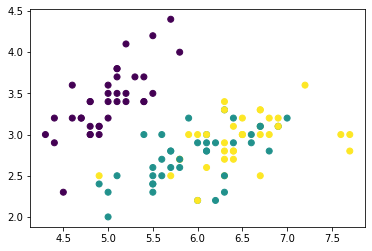

In [17]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)

### Для классов 0 и 1

In [18]:

small_train = X_train[(y_train == 0) | (y_train == 1)]
#small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
#small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

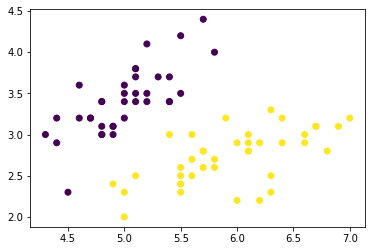

In [19]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)


In [20]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [21]:
# построим центроиды
lda_small.means_

array([[5.        , 3.41388889],
       [5.95128205, 2.72820513]])

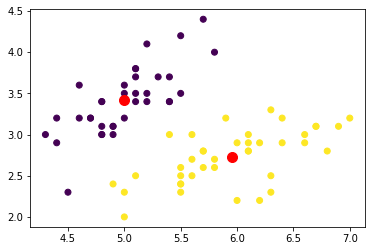

In [22]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=100, marker='o')

In [23]:
# коэффициенты модели
lda_small.coef_

array([[ 11.65251122, -14.44947534]])

In [24]:
# точность модели
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

### Для классов 0 и 2

In [25]:

small_train = X_train[(y_train == 0) | (y_train == 2)]
#small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
#small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

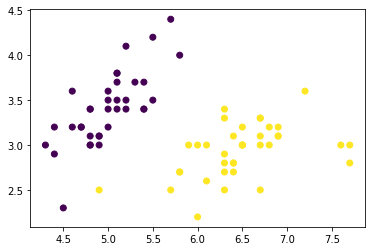

In [26]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)


In [27]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [28]:
# построим центроиды
lda_small.means_

array([[5.        , 3.41388889],
       [6.47837838, 2.93513514]])

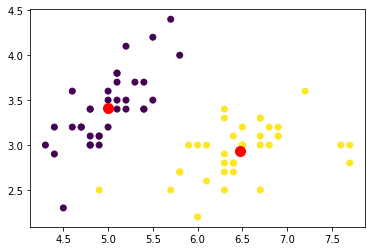

In [29]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=100, marker='o')

In [30]:
# коэффициенты модели
lda_small.coef_

array([[ 11.98041788, -12.61127317]])

In [31]:
# точность модели
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

### Для классов 1 и 2

In [32]:

small_train = X_train[(y_train == 1) | (y_train == 2)]
#small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 1) | (y_test == 2)]
#small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 1) | (y_test == 2)]

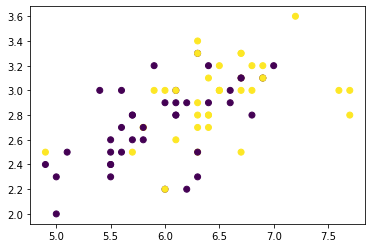

In [33]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)


In [34]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [35]:
# построим центроиды
lda_small.means_

array([[5.95128205, 2.72820513],
       [6.47837838, 2.93513514]])

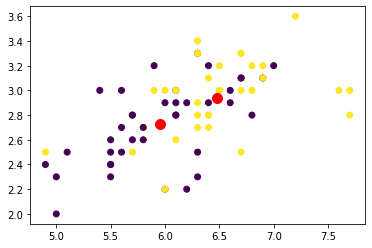

In [36]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=100, marker='o')

In [37]:
# коэффициенты модели
lda_small.coef_

array([[1.54825193, 0.65560506]])

In [38]:
# точность модели
accuracy_score(sy_test, lda_small.predict(small_test))



0.7916666666666666

### Подбор оптимального числа кластеров для признаков sepal_length и sepal_width по алгоритму kmeans. Визуализация полученной кластеризации.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


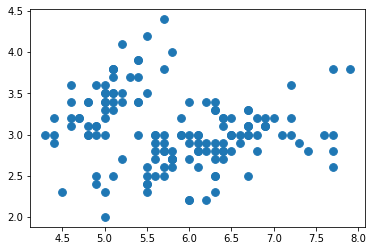

In [40]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', s=60)

In [41]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
X, y = train_test_split(data, test_size=0.25)

In [43]:
# fit-transform сразу обучает преобразует данные
X_scaled = scaler.fit_transform(X)

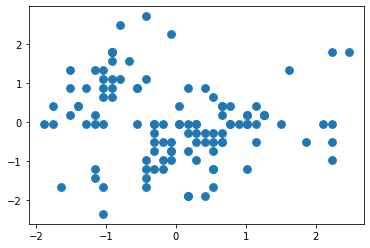

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [45]:
# импорт алгоритма KMeans
from sklearn.cluster import KMeans

In [46]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=3)

# fit_predict обучает на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 0])

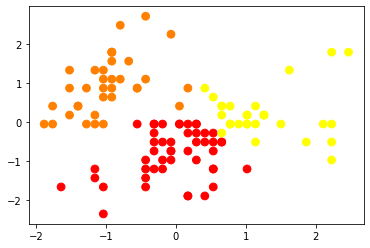

In [47]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [48]:
# график локтя

k_inertia = [] # список для инерции

ks = range(1, 20) # задаем диапазон кластеров

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_) # добавляем инерцию каждой модели в список

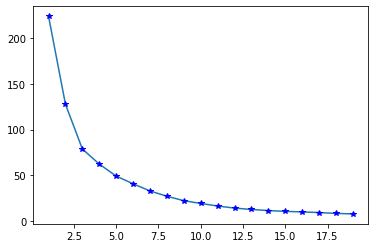

In [51]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

### Оптимальное число кластеров по методу локтя - 3.  
определение по визуализации числа кластеров неочевидно 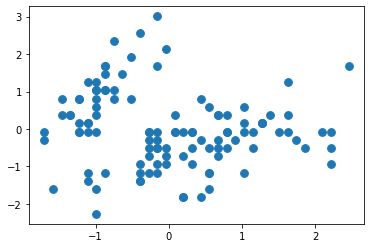 нужно проверять по методу "локтя".